# Retail Sales EDA

# Data Loading & Cleaning

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, time, date
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


#LOAD THE DATASET
retail_data = pd.read_csv("D:\\Oasis-infobyte\\retail_sales_dataset.csv", encoding='Unicode_escape')



In [9]:
# Display the first few rows of the dataset to understand its structure
print(retail_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [10]:
# Check for missing values and handle if necessary
print(retail_data.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


# Descriptive Statistics

In [12]:
print("\nDescriptive Statistics:")
descriptive_stats = retail_data.describe()
mean_sales = descriptive_stats.loc['mean', 'Quantity']
median_sales = retail_data['Quantity'].median()
mode_sales = retail_data['Quantity'].mode().values[0]
std_dev_sales = descriptive_stats.loc['std', 'Quantity']
# Display the calculated statistics
print(f"Mean Sales: {mean_sales:.2f}")
print(f"Median Sales: {median_sales:.2f}")
print(f"Mode Sales: {mode_sales:.2f}")
print(f"Standard Deviation of Sales: {std_dev_sales:.2f}")



Descriptive Statistics:
Mean Sales: 2.51
Median Sales: 3.00
Mode Sales: 4.00
Standard Deviation of Sales: 1.13


# Time Series Analysis

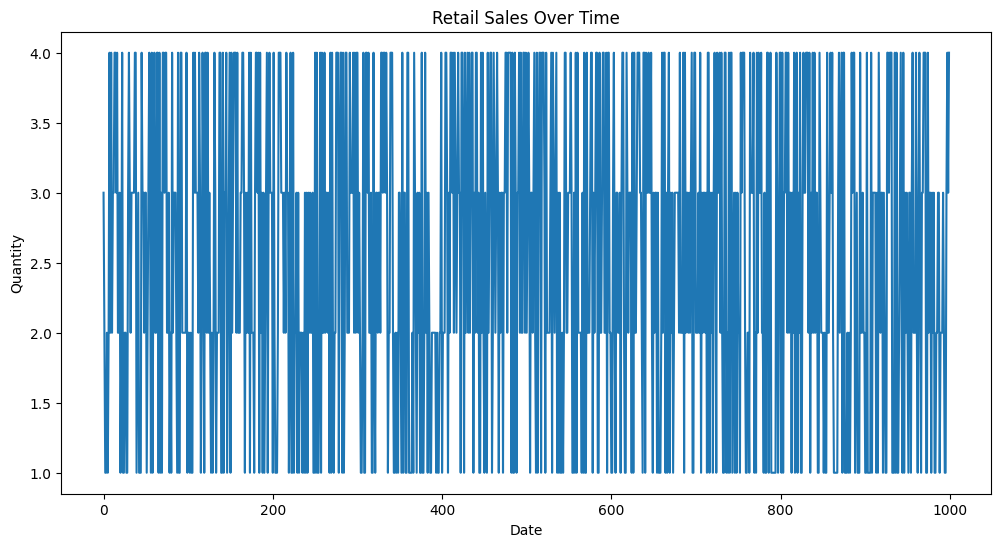

ADF Statistic: -32.7811025782032
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}


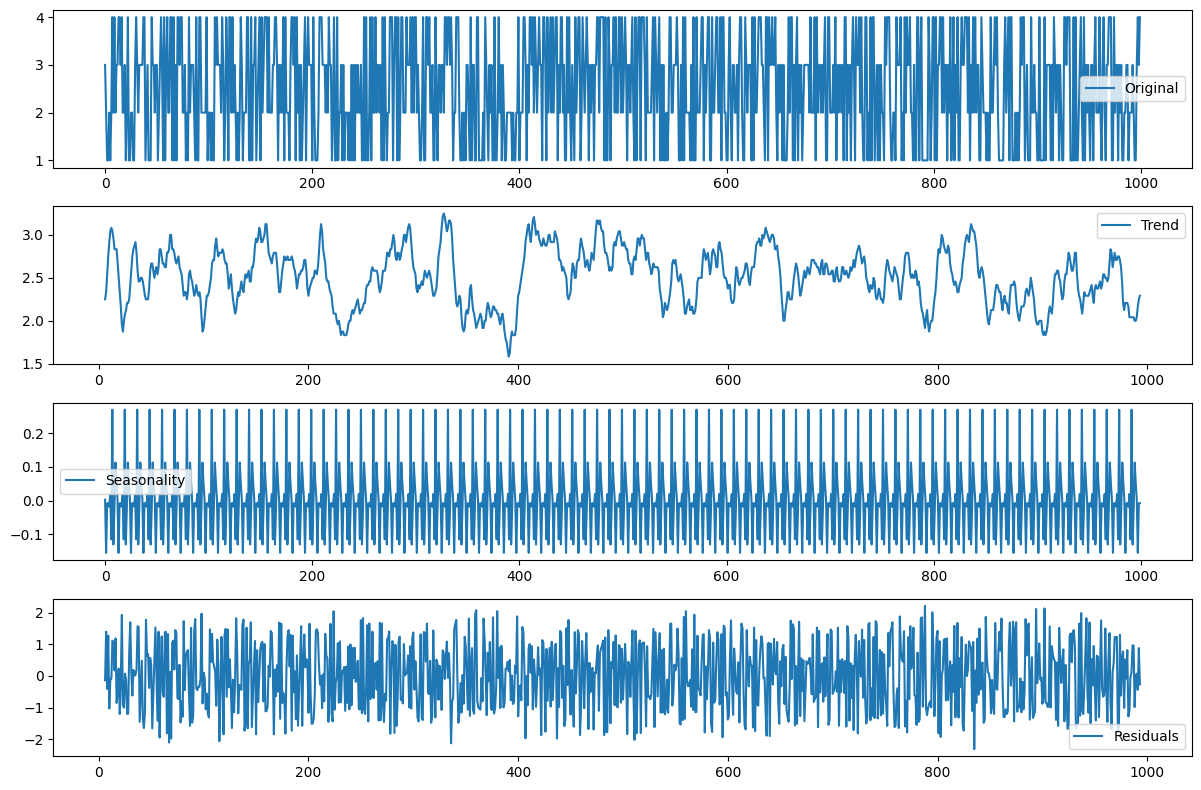

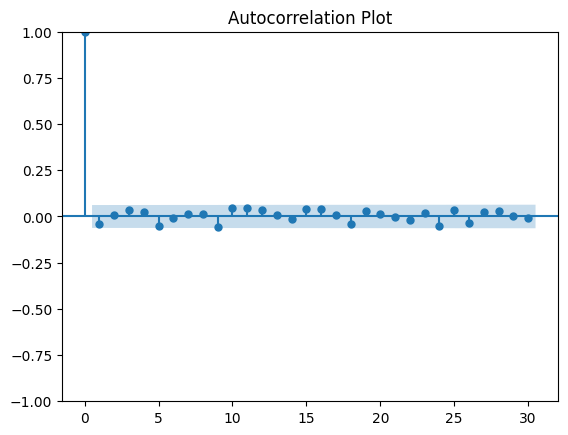

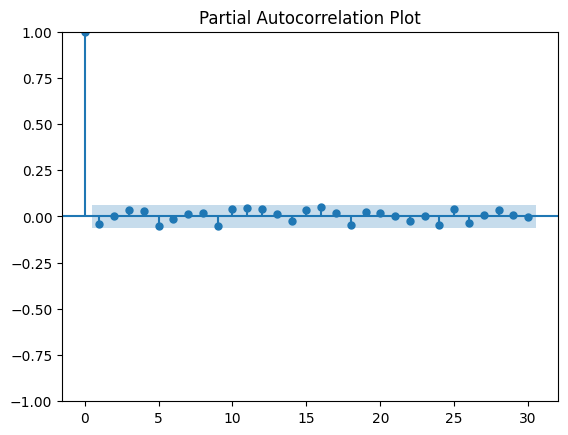

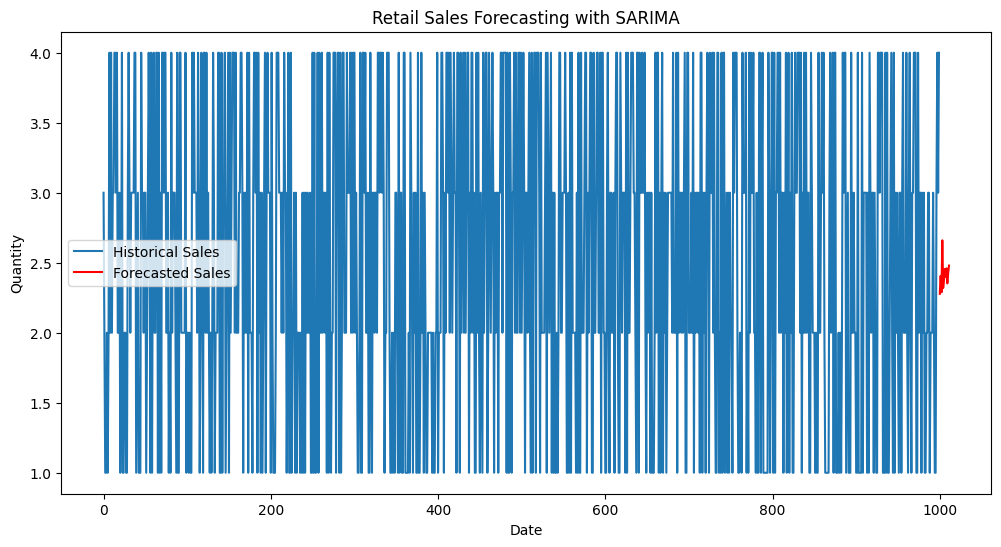

In [24]:


# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(retail_data['Quantity'])
plt.title('Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(retail_data['Quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(retail_data['Quantity'], period=12)  # Assuming monthly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(retail_data['Quantity'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation plots
plot_acf(retail_data['Quantity'])
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(retail_data['Quantity'])
plt.title('Partial Autocorrelation Plot')
plt.show()

# SARIMA model
order = (1, 1, 1)  # Adjust the order based on ACF and PACF plots
seasonal_order = (1, 1, 1, 12)  # Assuming monthly seasonality

model = SARIMAX(retail_data['Quantity'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Forecasting
forecast_steps = 12  # Adjust the number of steps based on your needs
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(retail_data['Quantity'], label='Historical Sales')
plt.plot(forecast.predicted_mean, color='red', label='Forecasted Sales')
plt.title('Retail Sales Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


# Customer and Product Analysis

<Figure size 1200x600 with 0 Axes>

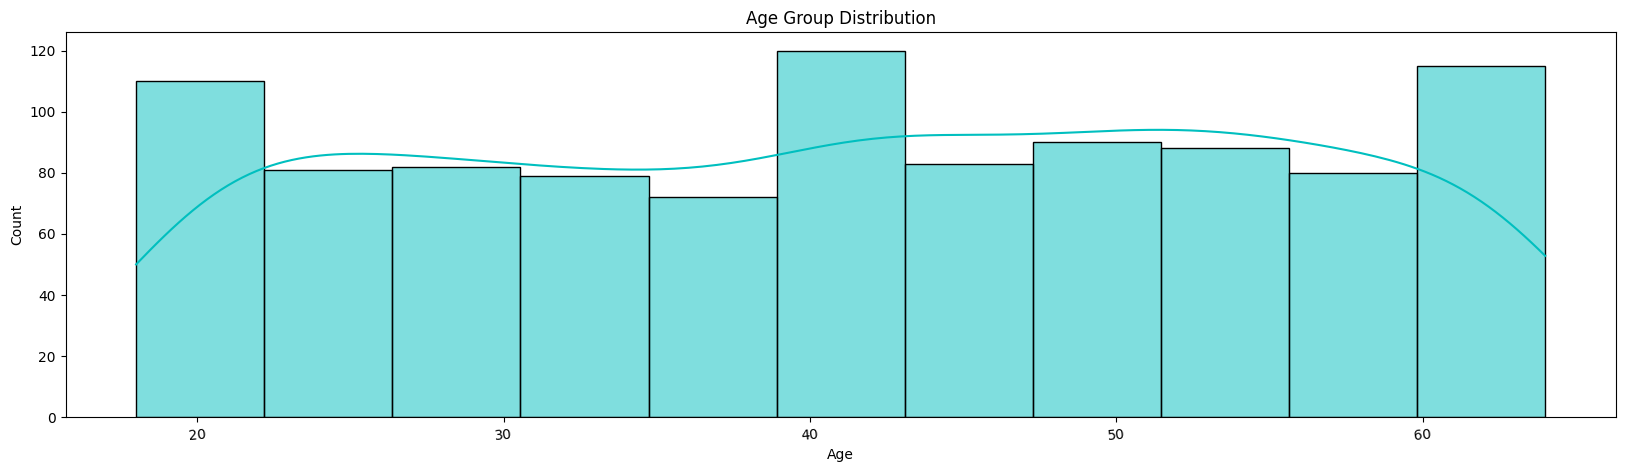

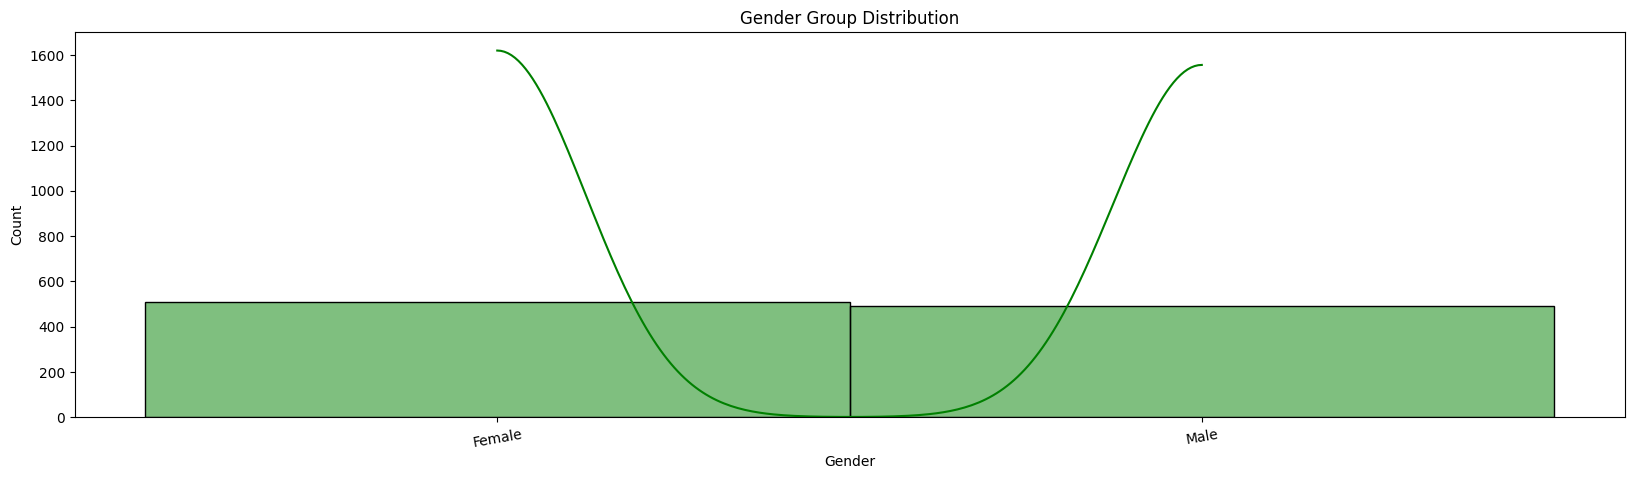

<Figure size 640x480 with 0 Axes>

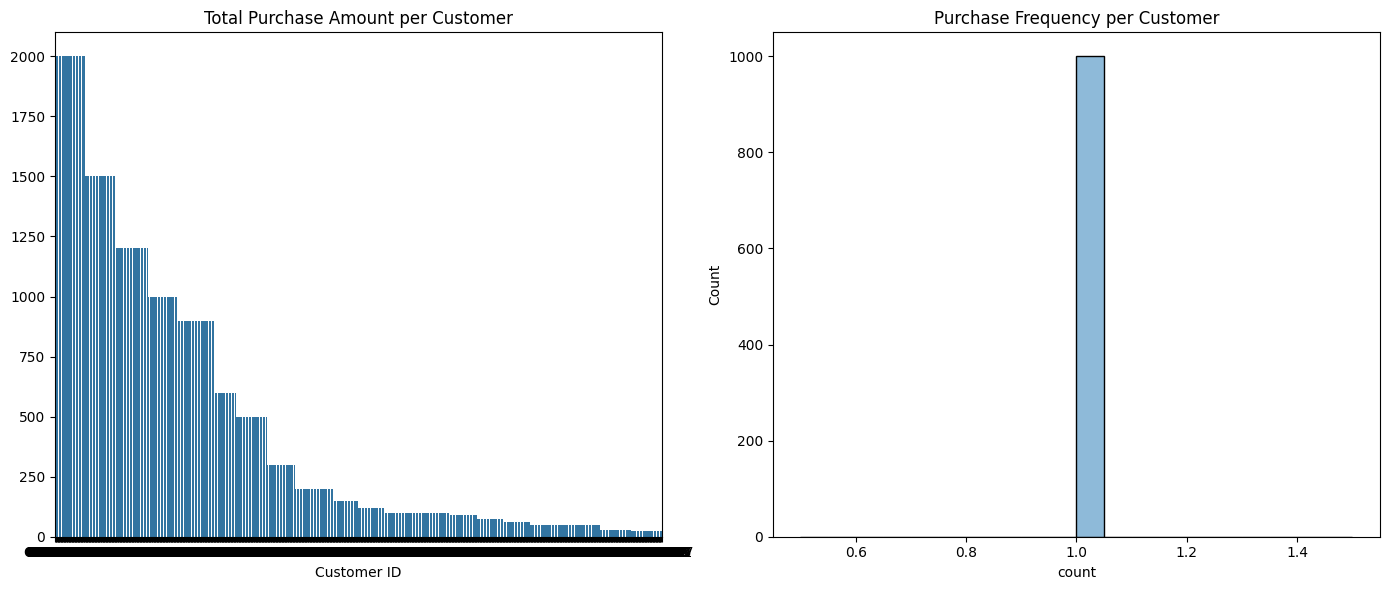

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [44]:
# Customer Demographics Analysis
plt.figure(figsize=(12, 6))

# Age Distribution
plt.figure(figsize=(20,5))
sns.histplot(data=retail_data,
             x=retail_data['Age'].sort_values(),
             kde=True,
             color='c')
plt.title('Age Distribution')
plt.xticks(rotation=5)
plt.show()

# Gender Distribution
plt.figure(figsize=(20,5))
sns.histplot(data=retail_data,
             x=retail_data['Gender'].sort_values(),
             kde=True,
             color='g')
plt.title('Gender Distribution')
plt.xticks(rotation=10)
plt.show()

plt.tight_layout()
plt.show()

# Purchasing Behavior Analysis
plt.figure(figsize=(14, 6))

# Total Purchase Amount per Customer
total_purchase_per_customer = retail_data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
plt.subplot(1, 2, 1)
sns.barplot(x=total_purchase_per_customer.index, y=total_purchase_per_customer.values)
plt.title('Total Purchase Amount per Customer')

# Purchase Frequency
purchase_frequency = retail_data['Customer ID'].value_counts()
plt.subplot(1, 2, 2)
sns.histplot(purchase_frequency, bins=20, kde=True)
plt.title('Purchase Frequency per Customer')

plt.tight_layout()
plt.show()

# Product Analysis
plt.figure(figsize=(12, 6))


# Visualizations

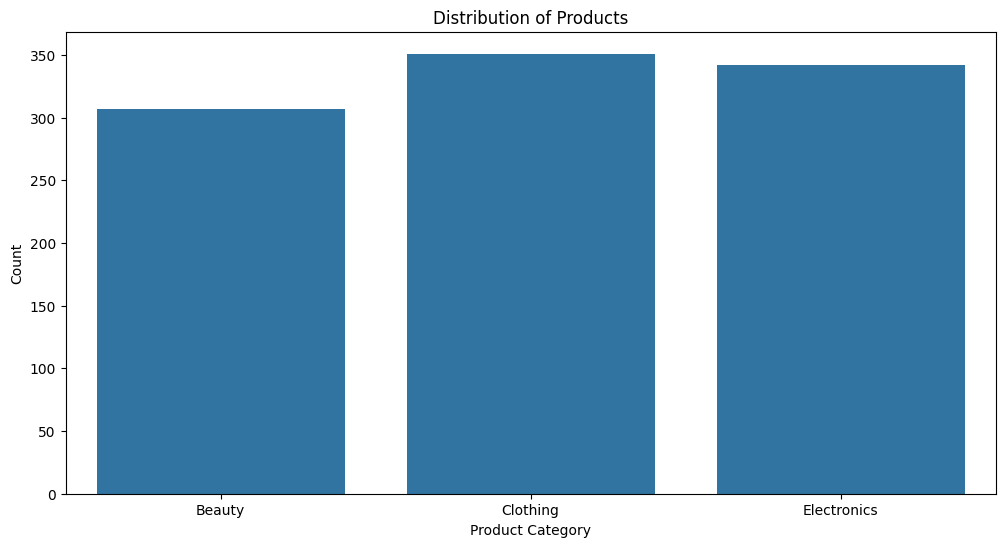

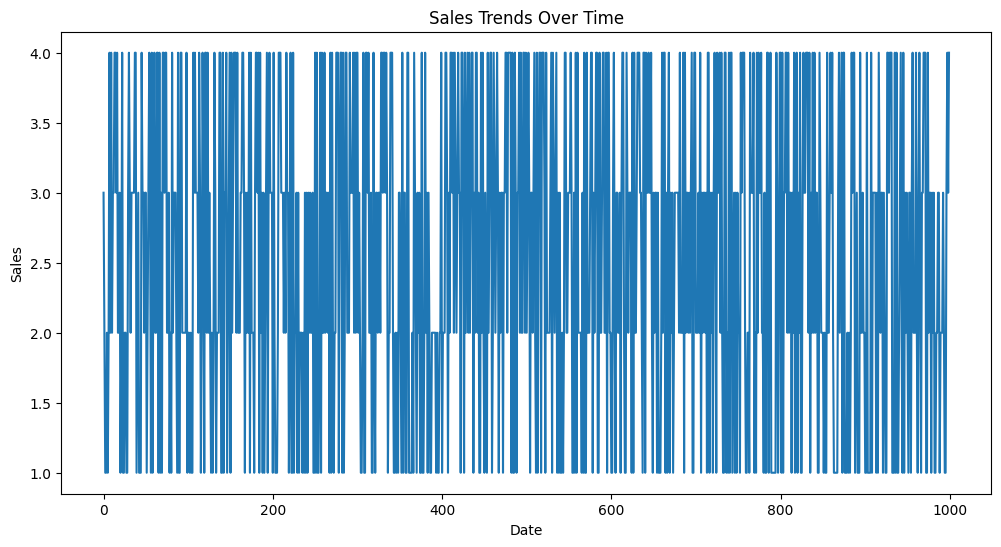

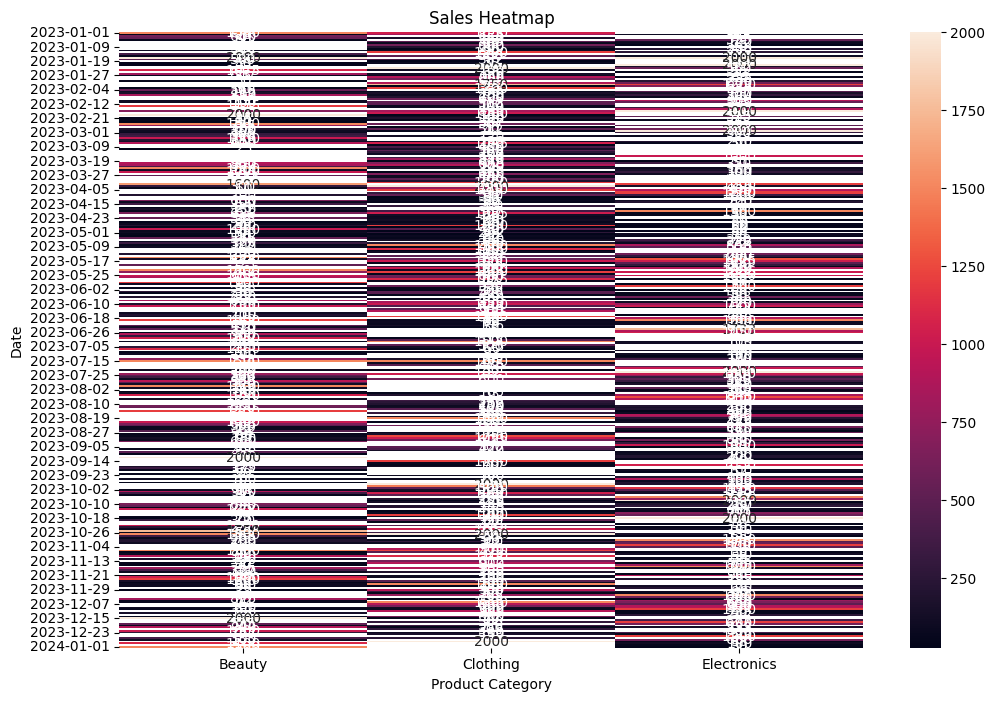

In [41]:
# Bar chart for product categories
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', data=retail_data)
plt.title('Distribution of Products')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Line plot for sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=retail_data.index, y='Quantity', data=retail_data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Heatmap for correlation matrix (if needed)
heatmap = retail_data.pivot_table(index='Date', columns='Product Category', values='Total Amount')
plt.figure(figsize=(12,8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.show()



# Recommendations:
1.Identify High-Performing Products and Categories:
Focus on promoting and stocking products or categories that consistently show high sales.
Consider bundling strategies or promotions for products with high demand.

2.Understand and Leverage Seasonal Trends:
Identify peak seasons and tailor marketing efforts and inventory management accordingly.
Plan promotions and discounts during slower periods to stimulate sales.

3.Targeted Marketing for Customer Segments:
Analyze customer demographics to understand the primary consumer groups.
Tailor marketing campaigns and promotions to target specific customer segments based on their preferences.

4.Optimize Inventory Management:
Use time series analysis to forecast demand and adjust inventory levels accordingly.
Implement just-in-time inventory strategies to minimize holding costs.

5.Enhance Customer Experience:
Analyze customer feedback or complaints to identify areas for improvement.
Invest in customer service training and initiatives to enhance overall customer satisfaction.

6.Explore Cross-Selling Opportunities:
Identify products frequently purchased together and create bundled offers.
Implement cross-selling strategies to increase the average transaction value.

7.Monitor and Respond to Customer Behavior Changes:
Keep a close eye on changing customer preferences and adapt the product offerings accordingly.
Utilize customer feedback and reviews to make informed adjustments to the product mix.

8.Implement Loyalty Programs:
Encourage repeat business by introducing loyalty programs.
Reward customers for their loyalty with discounts, exclusive offers, or other incentives.

9.Optimize Pricing Strategies:
Regularly evaluate pricing strategies based on competitor analysis and market trends.
Consider dynamic pricing models to stay competitive and maximize revenue.

10.Invest in Data Security and Privacy:
Ensure customer data is handled securely to build and maintain trust.
Comply with data protection regulations to avoid legal issues.